<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

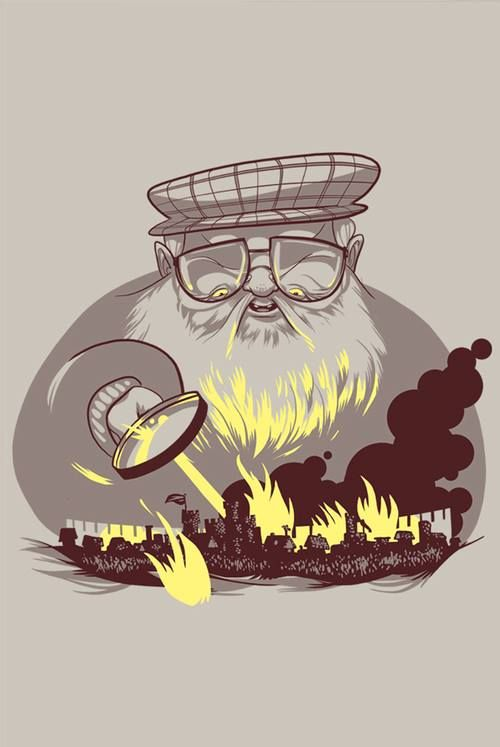

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test_old.csv
100% 38.3k/38.3k [00:00<00:00, 20.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train_old.csv
100% 141k/141k [00:00<00:00, 60.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("/content/game_of_thrones_train_old.csv",index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
DateoFdeath,1250
mother,1539
father,1535
heir,1536
house,381


In [5]:
data['DateoFdeath'] = data['DateoFdeath'].fillna(-1)
data['DateoFdeath'] = data['DateoFdeath'].apply(lambda x : 1 if x==-1  else 0)

data.drop(columns=['father','mother','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','dateOfBirth','age','title','name'], inplace = True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [6]:
data["isPopular"] = data["popularity"].apply(lambda x : 1 if x > 0.5 else 0)
data["boolDeadRelations"] = data["numDeadRelations"].apply(lambda x : x > 0.5)
data.drop(columns=['numDeadRelations','popularity'],inplace=True)

In [7]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

data['culture'] = data['culture'].str.lower()
for keys in cult:
  for values in cult[keys]:
    data["culture"] = data["culture"].replace(values,keys)



**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [8]:
data['culture'] = data['culture'].fillna('Unknown')
data['house'] = data['house'].fillna('Unknown')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['culture']= label_encoder.fit_transform(data['culture'])
data['house']= label_encoder.fit_transform(data['house'])


<Axes: >

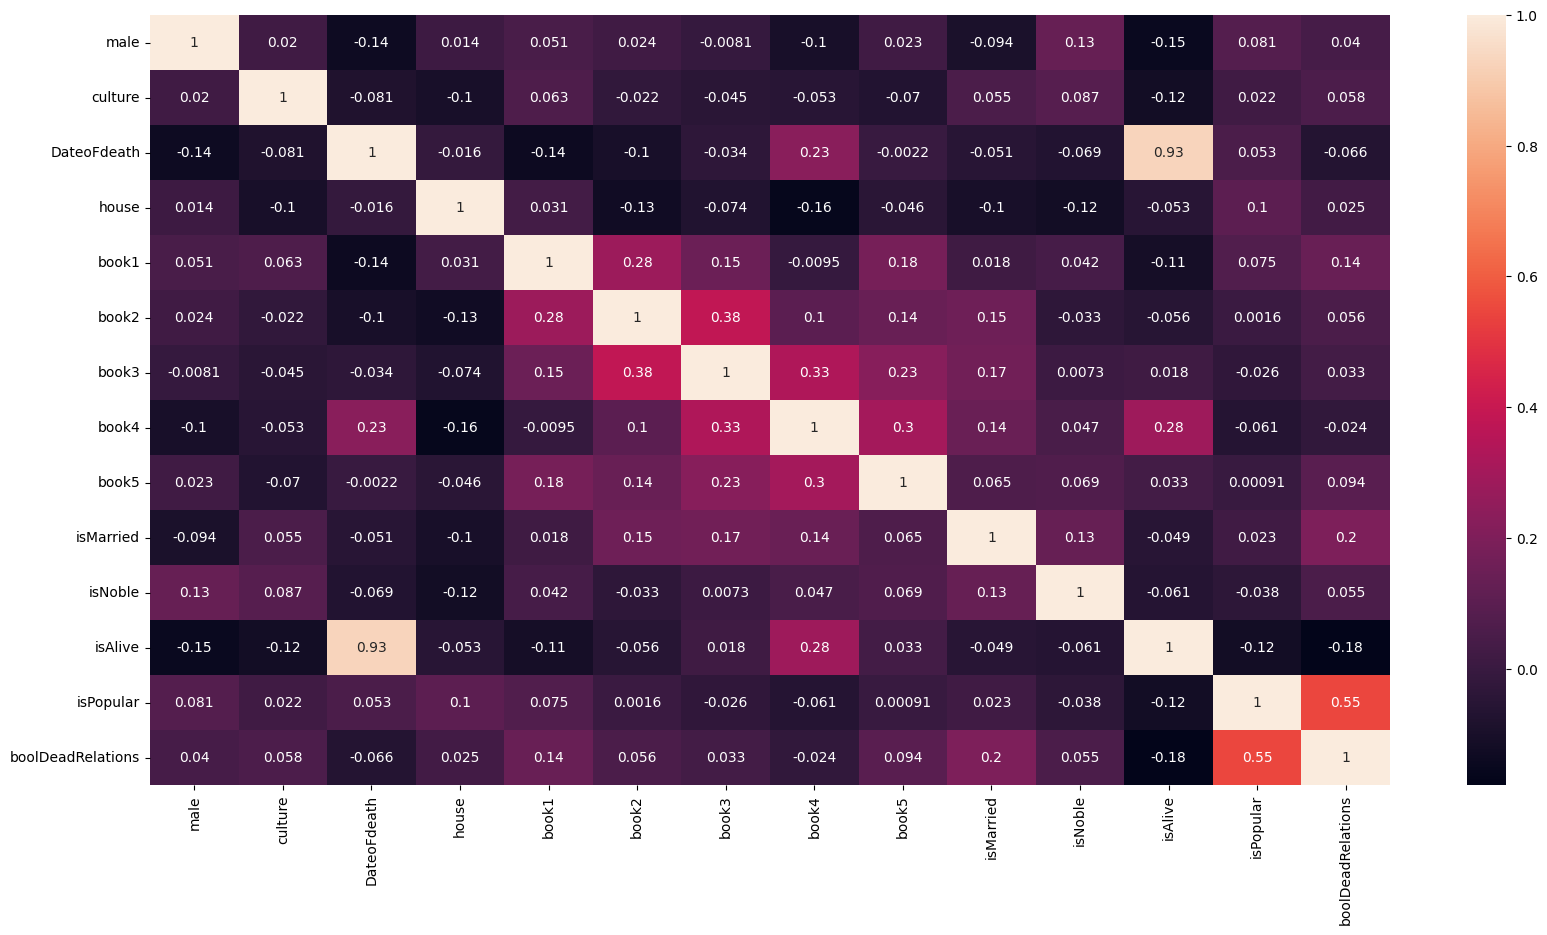

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [10]:
# Целевая переменная : 0 или 1 => велечина категориальная
data['isAlive'].value_counts()
# Датасет несбалансирован по классам, поточу что прмиерно 80% значений целевой переменной = 1 , а только лишь 20% = 0

,count
isAlive,
1,1212
0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# = пункт 1.5

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

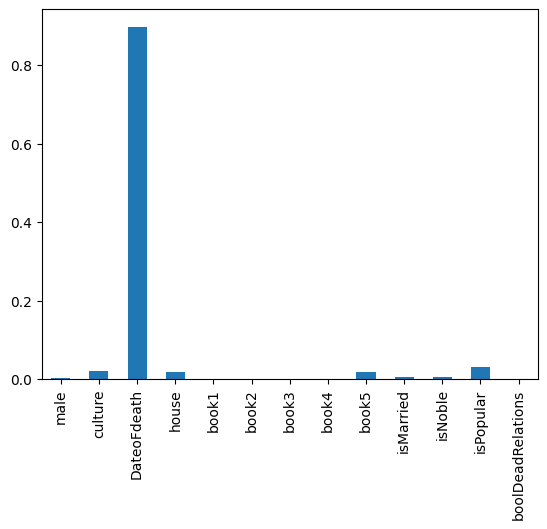

In [11]:
X_train = data.drop('isAlive', axis=1)
y_train = data['isAlive']

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Визуализация дерева решений
chart = pd.Series(tree_model.feature_importances_, index=X_train.columns).plot(kind = "bar")
plt.show()



**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [12]:
X = data.drop(['isAlive'], axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [15]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [16]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [17]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
logistic_regression_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [18]:
# Шаг 1. создание модели
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
ab = AdaBoostClassifier()
gp = GaussianProcessClassifier()

# Шаг 2. обучение модели
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
nb.fit(X_train,y_train)
ab.fit(X_train,y_train)
gp.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
nb_pred = nb.predict(X_test)
ab_pred = ab.predict(X_test)
gp_pred = gp.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [19]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [20]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print("Logistic_regression Accuracy : %.4f" % logistic_regression_accuracy)

Logistic_regression Accuracy : 1.0000


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [21]:
# Шаг 4. Оценка предсказания по метрике accuracy
knn_accuracy = accuracy_score(y_test,knn_pred)
svm_accuracy = accuracy_score(y_test,svm_pred)
dt_accuracy = accuracy_score(y_test,dt_pred)
rf_accuracy = accuracy_score(y_test,rf_pred)
nb_accuracy = accuracy_score(y_test,nb_pred)
ab_accuracy = accuracy_score(y_test,ab_pred)
gp_accuracy = accuracy_score(y_test,gp_pred)

print("KNN Accuracy : %.4f" % knn_accuracy)
print("SVM Accuracy : %.4f" % svm_accuracy)
print("DTS Accuracy : %.4f" % dt_accuracy)
print("RF Accuracy : %.4f" % rf_accuracy)
print("NB Accuracy : %.4f" % nb_accuracy)
print("AB Accuracy : %.4f" % ab_accuracy)
print("GP Accuracy : %.4f" % gp_accuracy)

KNN Accuracy : 0.8782
SVM Accuracy : 0.7853
DTS Accuracy : 0.9872
RF Accuracy : 1.0000
NB Accuracy : 0.9776
AB Accuracy : 1.0000
GP Accuracy : 0.9006


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [22]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 6.13MB/s]


In [23]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')


test_data = pd.read_csv("/content/game_of_thrones_test_old.csv",index_col="S.No")

test_data['DateoFdeath'] = test_data['DateoFdeath'].fillna(-1).apply(lambda x : 1 if x==-1  else 0)
test_data["isPopular"] = test_data["popularity"].apply(lambda x : 1 if x > 0.5 else 0)
test_data["boolDeadRelations"] = test_data["numDeadRelations"].apply(lambda x : x > 0.5)
test_data.drop(columns=['numDeadRelations','popularity'],inplace=True)

test_data.drop(columns=['name','father','mother','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','dateOfBirth','age','title'], inplace = True)

label_encoder = LabelEncoder()
test_data['culture']= label_encoder.fit_transform(test_data['culture'])
test_data['house']= label_encoder.fit_transform(test_data['house'])

test_pred = rf.predict(test_data)



In [24]:
submission['isAlive'] = test_pred

In [25]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [26]:
submission.to_csv("/content/new_submission.csv", index=False)